In [1]:
# Generic inputs for most ML tasks
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.ensemble import RandomForestRegressor
from sklearn.cluster import KMeans

pd.options.display.float_format = '{:,.2f}'.format

# setup interactive notebook mode
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

from IPython.display import display, HTML

In [2]:
movie_data = pd.read_csv('../Data Sets/imdb_top_1000_cleaned.csv')

movie_data.head()

,Series_Title,Released_Year,Certificate,Runtime,Genre,IMDB_Rating,Overview,Meta_score,Director,Star1,Star2,Star3,Star4,No_of_Votes,Gross
0,The Shawshank Redemption,1994,A,142 min,Drama,9.30,Two imprisoned men bond over a number of years...,80.00,Frank Darabont,Tim Robbins,Morgan Freeman,Bob Gunton,William Sadler,2343110,"28,341,469"
1,The Godfather,1972,A,175 min,"Crime, Drama",9.20,An organized crime dynasty's aging patriarch t...,100.00,Francis Ford Coppola,Marlon Brando,Al Pacino,James Caan,Diane Keaton,1620367,"134,966,411"
2,The Dark Knight,2008,UA,152 min,"Action, Crime, Drama",9.00,When the menace known as the Joker wreaks havo...,84.00,Christopher Nolan,Christian Bale,Heath Ledger,Aaron Eckhart,Michael Caine,2303232,"534,858,444"
3,The Godfather: Part II,1974,A,202 min,"Crime, Drama",9.00,The early life and career of Vito Corleone in ...,90.00,Francis Ford Coppola,Al Pacino,Robert De Niro,Robert Duvall,Diane Keaton,1129952,"57,300,000"
4,12 Angry Men,1957,U,96 min,"Crime, Drama",9.00,A jury holdout attempts to prevent a miscarria...,96.00,Sidney Lumet,Henry Fonda,Lee J. Cobb,Martin Balsam,John Fiedler,689845,"4,360,000"


## 1 a)

In [3]:
Kval = 6 # Number of clusters

movie_data.isna().sum()

Series_Title      0
Released_Year     0
Certificate      46
Runtime           0
Genre             0
IMDB_Rating       0
Overview          0
Meta_score       81
Director          0
Star1             0
Star2             0
Star3             0
Star4             0
No_of_Votes       0
Gross             0
dtype: int64

## meta_score and certificate has null values

In [4]:
movie_data.dropna(inplace=True)

In [5]:
movie_data.reset_index(drop=True, inplace=True)

In [6]:
movie_data.drop(columns=['Overview'],inplace=True)

## 1b

In [7]:
movie_data

,Series_Title,Released_Year,Certificate,Runtime,Genre,IMDB_Rating,Meta_score,Director,Star1,Star2,Star3,Star4,No_of_Votes,Gross
0,The Shawshank Redemption,1994,A,142 min,Drama,9.30,80.00,Frank Darabont,Tim Robbins,Morgan Freeman,Bob Gunton,William Sadler,2343110,"28,341,469"
1,The Godfather,1972,A,175 min,"Crime, Drama",9.20,100.00,Francis Ford Coppola,Marlon Brando,Al Pacino,James Caan,Diane Keaton,1620367,"134,966,411"
2,The Dark Knight,2008,UA,152 min,"Action, Crime, Drama",9.00,84.00,Christopher Nolan,Christian Bale,Heath Ledger,Aaron Eckhart,Michael Caine,2303232,"534,858,444"
3,The Godfather: Part II,1974,A,202 min,"Crime, Drama",9.00,90.00,Francis Ford Coppola,Al Pacino,Robert De Niro,Robert Duvall,Diane Keaton,1129952,"57,300,000"
4,12 Angry Men,1957,U,96 min,"Crime, Drama",9.00,96.00,Sidney Lumet,Henry Fonda,Lee J. Cobb,Martin Balsam,John Fiedler,689845,"4,360,000"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
709,Giù la testa,1971,PG,157 min,"Drama, War, Western",7.60,77.00,Sergio Leone,Rod Steiger,James Coburn,Romolo Valli,Maria Monti,30144,"696,690"
710,Kelly's Heroes,1970,GP,144 min,"Adventure, Comedy, War",7.60,50.00,Brian G. Hutton,Clint Eastwood,Telly Savalas,Don Rickles,Carroll O'Connor,45338,"1,378,435"
711,The Jungle Book,1967,U,78 min,"Animation, Adventure, Family",7.60,65.00,Wolfgang Reitherman,Phil Harris,Sebastian Cabot,Louis Prima,Bruce Reitherman,166409,"141,843,612"
712,A Hard Day's Night,1964,U,87 min,"Comedy, Music, Musical",7.60,96.00,Richard Lester,John Lennon,Paul McCartney,George Harrison,Ringo Starr,40351,"13,780,024"


## 714 rows

In [8]:
movie_data['Gross'] = movie_data['Gross'].str.replace(',',  '').astype(int)
movie_data['Runtime'] = movie_data['Runtime'].str.replace(' min',  '').astype(int)

## 1 c

In [9]:
movie_data.dtypes

Series_Title      object
Released_Year      int64
Certificate       object
Runtime            int64
Genre             object
IMDB_Rating      float64
Meta_score       float64
Director          object
Star1             object
Star2             object
Star3             object
Star4             object
No_of_Votes        int64
Gross              int64
dtype: object

## genre has object data type

## 1 d

In [10]:
# define function to import viz libraries
import plotly
plotly.offline.init_notebook_mode(connected=True)
from plotly.graph_objs import *
from plotly import tools
import plotly.graph_objects as go
import seaborn as sns

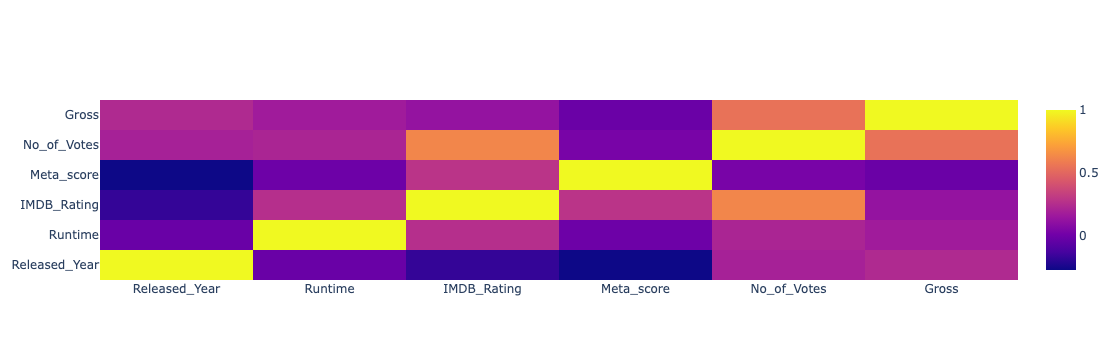

In [11]:
# correl = subset_data.corr()
correl = movie_data.corr()

trace = go.Heatmap(z=correl.values,
                  x=correl.index.values,
                  y=correl.columns.values)
data=[trace]
plotly.offline.iplot(data, filename='basic-heatmap')

## No_of_Votes has high correlation with gross

In [12]:
movie_data.columns

Index(['Series_Title', 'Released_Year', 'Certificate', 'Runtime', 'Genre',
       'IMDB_Rating', 'Meta_score', 'Director', 'Star1', 'Star2', 'Star3',
       'Star4', 'No_of_Votes', 'Gross'],
      dtype='object')

In [13]:
movie_data_numeric=movie_data[['Released_Year','Runtime','IMDB_Rating','Meta_score','No_of_Votes', 'Gross']]
movie_data_rating=movie_data[['IMDB_Rating', 'Meta_score']]


In [14]:
movie_data_numeric
movie_data_rating

,Released_Year,Runtime,IMDB_Rating,Meta_score,No_of_Votes,Gross
0,1994,142,9.30,80.00,2343110,28341469
1,1972,175,9.20,100.00,1620367,134966411
2,2008,152,9.00,84.00,2303232,534858444
3,1974,202,9.00,90.00,1129952,57300000
4,1957,96,9.00,96.00,689845,4360000
...,...,...,...,...,...,...
709,1971,157,7.60,77.00,30144,696690
710,1970,144,7.60,50.00,45338,1378435
711,1967,78,7.60,65.00,166409,141843612
712,1964,87,7.60,96.00,40351,13780024


,IMDB_Rating,Meta_score
0,9.30,80.00
1,9.20,100.00
2,9.00,84.00
3,9.00,90.00
4,9.00,96.00
...,...,...
709,7.60,77.00
710,7.60,50.00
711,7.60,65.00
712,7.60,96.00


In [15]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
scaled_data_numeric = pd.DataFrame(sc.fit_transform(movie_data_numeric), columns = movie_data_numeric.columns, index = movie_data_numeric.index)
scaled_data_rating = pd.DataFrame(sc.fit_transform(movie_data_rating), columns = movie_data_rating.columns, index = movie_data_rating.index)

scaled_data_rating.head()

,IMDB_Rating,Meta_score
0,4.65,0.23
1,4.31,1.84
2,3.63,0.55
3,3.63,1.04
4,3.63,1.52


In [16]:
scaled_data_numeric

,Released_Year,Runtime,IMDB_Rating,Meta_score,No_of_Votes,Gross
0,-0.09,0.71,4.65,0.23,5.62,-0.44
1,-1.28,1.98,4.31,1.84,3.57,0.49
2,0.66,1.09,3.63,0.55,5.51,3.97
3,-1.17,3.03,3.63,1.04,2.19,-0.18
4,-2.09,-1.07,3.63,1.52,0.94,-0.65
...,...,...,...,...,...,...
709,-1.33,1.29,-1.15,-0.01,-0.92,-0.68
710,-1.39,0.78,-1.15,-2.19,-0.88,-0.67
711,-1.55,-1.77,-1.15,-0.98,-0.54,0.55
712,-1.71,-1.42,-1.15,1.52,-0.89,-0.56


In [17]:
x= movie_data[movie_data['Series_Title']=='The Shawshank Redemption']
x

,Series_Title,Released_Year,Certificate,Runtime,Genre,IMDB_Rating,Meta_score,Director,Star1,Star2,Star3,Star4,No_of_Votes,Gross
0,The Shawshank Redemption,1994,A,142,Drama,9.30,80.00,Frank Darabont,Tim Robbins,Morgan Freeman,Bob Gunton,William Sadler,2343110,28341469


## 1 e

In [18]:
scaled_data_numeric

,Released_Year,Runtime,IMDB_Rating,Meta_score,No_of_Votes,Gross
0,-0.09,0.71,4.65,0.23,5.62,-0.44
1,-1.28,1.98,4.31,1.84,3.57,0.49
2,0.66,1.09,3.63,0.55,5.51,3.97
3,-1.17,3.03,3.63,1.04,2.19,-0.18
4,-2.09,-1.07,3.63,1.52,0.94,-0.65
...,...,...,...,...,...,...
709,-1.33,1.29,-1.15,-0.01,-0.92,-0.68
710,-1.39,0.78,-1.15,-2.19,-0.88,-0.67
711,-1.55,-1.77,-1.15,-0.98,-0.54,0.55
712,-1.71,-1.42,-1.15,1.52,-0.89,-0.56


## scaled value for gorss for the movie The Shawshank Redemption is -0.44

## 2 a

In [19]:
Kval = 6 # Number of clusters

In [20]:
km = KMeans(n_clusters = 6, 
        init = 'k-means++', # this initializes by placing the initial ones randomly and uniformly in grid
        n_init = 10, 
        max_iter = 500, 
        # tol = 1e-04, 
        random_state = 50)
data_km = pd.DataFrame(km.fit_predict(scaled_data_rating), index = scaled_data_rating.index)
data_scaled_km=pd.DataFrame(km.fit_predict(scaled_data_rating), index = scaled_data_rating.index)

In [21]:
data_km.head()

,0
0,3
1,3
2,3
3,3
4,3


In [22]:
movie_data

,Series_Title,Released_Year,Certificate,Runtime,Genre,IMDB_Rating,Meta_score,Director,Star1,Star2,Star3,Star4,No_of_Votes,Gross
0,The Shawshank Redemption,1994,A,142,Drama,9.30,80.00,Frank Darabont,Tim Robbins,Morgan Freeman,Bob Gunton,William Sadler,2343110,28341469
1,The Godfather,1972,A,175,"Crime, Drama",9.20,100.00,Francis Ford Coppola,Marlon Brando,Al Pacino,James Caan,Diane Keaton,1620367,134966411
2,The Dark Knight,2008,UA,152,"Action, Crime, Drama",9.00,84.00,Christopher Nolan,Christian Bale,Heath Ledger,Aaron Eckhart,Michael Caine,2303232,534858444
3,The Godfather: Part II,1974,A,202,"Crime, Drama",9.00,90.00,Francis Ford Coppola,Al Pacino,Robert De Niro,Robert Duvall,Diane Keaton,1129952,57300000
4,12 Angry Men,1957,U,96,"Crime, Drama",9.00,96.00,Sidney Lumet,Henry Fonda,Lee J. Cobb,Martin Balsam,John Fiedler,689845,4360000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
709,Giù la testa,1971,PG,157,"Drama, War, Western",7.60,77.00,Sergio Leone,Rod Steiger,James Coburn,Romolo Valli,Maria Monti,30144,696690
710,Kelly's Heroes,1970,GP,144,"Adventure, Comedy, War",7.60,50.00,Brian G. Hutton,Clint Eastwood,Telly Savalas,Don Rickles,Carroll O'Connor,45338,1378435
711,The Jungle Book,1967,U,78,"Animation, Adventure, Family",7.60,65.00,Wolfgang Reitherman,Phil Harris,Sebastian Cabot,Louis Prima,Bruce Reitherman,166409,141843612
712,A Hard Day's Night,1964,U,87,"Comedy, Music, Musical",7.60,96.00,Richard Lester,John Lennon,Paul McCartney,George Harrison,Ringo Starr,40351,13780024


In [23]:
data_km.rename(columns = {0:'cluster'}, inplace = True)
data_km = data_km.merge(movie_data, left_index = True, right_index = True)
data_km

data_scaled_km.rename(columns = {0:'cluster'}, inplace = True)
data_scaled_km = data_scaled_km.merge(scaled_data_numeric, left_index = True, right_index = True)
data_scaled_km

,cluster,Series_Title,Released_Year,Certificate,Runtime,Genre,IMDB_Rating,Meta_score,Director,Star1,Star2,Star3,Star4,No_of_Votes,Gross
0,3,The Shawshank Redemption,1994,A,142,Drama,9.30,80.00,Frank Darabont,Tim Robbins,Morgan Freeman,Bob Gunton,William Sadler,2343110,28341469
1,3,The Godfather,1972,A,175,"Crime, Drama",9.20,100.00,Francis Ford Coppola,Marlon Brando,Al Pacino,James Caan,Diane Keaton,1620367,134966411
2,3,The Dark Knight,2008,UA,152,"Action, Crime, Drama",9.00,84.00,Christopher Nolan,Christian Bale,Heath Ledger,Aaron Eckhart,Michael Caine,2303232,534858444
3,3,The Godfather: Part II,1974,A,202,"Crime, Drama",9.00,90.00,Francis Ford Coppola,Al Pacino,Robert De Niro,Robert Duvall,Diane Keaton,1129952,57300000
4,3,12 Angry Men,1957,U,96,"Crime, Drama",9.00,96.00,Sidney Lumet,Henry Fonda,Lee J. Cobb,Martin Balsam,John Fiedler,689845,4360000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
709,5,Giù la testa,1971,PG,157,"Drama, War, Western",7.60,77.00,Sergio Leone,Rod Steiger,James Coburn,Romolo Valli,Maria Monti,30144,696690
710,0,Kelly's Heroes,1970,GP,144,"Adventure, Comedy, War",7.60,50.00,Brian G. Hutton,Clint Eastwood,Telly Savalas,Don Rickles,Carroll O'Connor,45338,1378435
711,5,The Jungle Book,1967,U,78,"Animation, Adventure, Family",7.60,65.00,Wolfgang Reitherman,Phil Harris,Sebastian Cabot,Louis Prima,Bruce Reitherman,166409,141843612
712,2,A Hard Day's Night,1964,U,87,"Comedy, Music, Musical",7.60,96.00,Richard Lester,John Lennon,Paul McCartney,George Harrison,Ringo Starr,40351,13780024


,cluster,Released_Year,Runtime,IMDB_Rating,Meta_score,No_of_Votes,Gross
0,3,-0.09,0.71,4.65,0.23,5.62,-0.44
1,3,-1.28,1.98,4.31,1.84,3.57,0.49
2,3,0.66,1.09,3.63,0.55,5.51,3.97
3,3,-1.17,3.03,3.63,1.04,2.19,-0.18
4,3,-2.09,-1.07,3.63,1.52,0.94,-0.65
...,...,...,...,...,...,...,...
709,5,-1.33,1.29,-1.15,-0.01,-0.92,-0.68
710,0,-1.39,0.78,-1.15,-2.19,-0.88,-0.67
711,5,-1.55,-1.77,-1.15,-0.98,-0.54,0.55
712,2,-1.71,-1.42,-1.15,1.52,-0.89,-0.56


In [24]:
data_km[data_km['cluster']==1]

,cluster,Series_Title,Released_Year,Certificate,Runtime,Genre,IMDB_Rating,Meta_score,Director,Star1,Star2,Star3,Star4,No_of_Votes,Gross
70,1,Jodaeiye Nader az Simin,2011,PG-13,123,Drama,8.30,95.00,Asghar Farhadi,Payman Maadi,Leila Hatami,Sareh Bayat,Shahab Hosseini,220002,7098492
73,1,Eternal Sunshine of the Spotless Mind,2004,UA,108,"Drama, Romance, Sci-Fi",8.30,89.00,Michel Gondry,Jim Carrey,Kate Winslet,Tom Wilkinson,Gerry Robert Byrne,911664,34400301
77,1,American Beauty,1999,UA,122,Drama,8.30,84.00,Sam Mendes,Kevin Spacey,Annette Bening,Thora Birch,Wes Bentley,1069738,130096601
80,1,Toy Story,1995,U,81,"Animation, Adventure, Comedy",8.30,95.00,John Lasseter,Tom Hanks,Tim Allen,Don Rickles,Jim Varney,887429,191796233
84,1,Aliens,1986,U,137,"Action, Adventure, Sci-Fi",8.30,84.00,James Cameron,Sigourney Weaver,Michael Biehn,Carrie Henn,Paul Reiser,652719,85160248
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
374,1,High Noon,1952,PG,85,"Drama, Thriller, Western",7.90,89.00,Fred Zinnemann,Gary Cooper,Grace Kelly,Thomas Mitchell,Lloyd Bridges,97222,9450000
375,1,Strangers on a Train,1951,A,101,"Crime, Film-Noir, Thriller",7.90,88.00,Alfred Hitchcock,Farley Granger,Robert Walker,Ruth Roman,Leo G. Carroll,123341,7630000
376,1,Notorious,1946,U,102,"Drama, Film-Noir, Romance",7.90,100.00,Alfred Hitchcock,Cary Grant,Ingrid Bergman,Claude Rains,Louis Calhern,92306,10464000
377,1,The Adventures of Robin Hood,1938,PG,102,"Action, Adventure, Romance",7.90,97.00,Michael Curtiz,William Keighley,Errol Flynn,Olivia de Havilland,Basil Rathbone,47175,3981000


In [25]:
data_km[data_km['Meta_score']<=60]

,cluster,Series_Title,Released_Year,Certificate,Runtime,Genre,IMDB_Rating,Meta_score,Director,Star1,Star2,Star3,Star4,No_of_Votes,Gross
24,4,La vita è bella,1997,U,116,"Comedy, Drama, Romance",8.60,59.00,Roberto Benigni,Roberto Benigni,Nicoletta Braschi,Giorgio Cantarini,Giustino Durano,623629,57598247
29,4,Joker,2019,A,122,"Crime, Drama, Thriller",8.50,59.00,Todd Phillips,Joaquin Phoenix,Robert De Niro,Zazie Beetz,Frances Conroy,939252,335451311
31,4,The Intouchables,2011,UA,112,"Biography, Comedy, Drama",8.50,57.00,Olivier Nakache,Éric Toledano,François Cluzet,Omar Sy,Anne Le Ny,760360,13182281
75,4,Snatch,2000,UA,104,"Comedy, Crime",8.30,55.00,Guy Ritchie,Jason Statham,Brad Pitt,Benicio Del Toro,Dennis Farina,782001,30328156
87,4,Star Wars: Episode VI - Return of the Jedi,1983,U,131,"Action, Adventure, Fantasy",8.30,58.00,Richard Marquand,Mark Hamill,Harrison Ford,Carrie Fisher,Billy Dee Williams,950470,309125409
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
683,0,Die Hard: With a Vengeance,1995,A,128,"Action, Adventure, Thriller",7.60,58.00,John McTiernan,Bruce Willis,Jeremy Irons,Samuel L. Jackson,Graham Greene,364420,100012499
688,0,Falling Down,1993,R,113,"Action, Crime, Drama",7.60,56.00,Joel Schumacher,Michael Douglas,Robert Duvall,Barbara Hershey,Rachel Ticotin,171640,40903593
694,0,The Godfather: Part III,1990,A,162,"Crime, Drama",7.60,60.00,Francis Ford Coppola,Al Pacino,Diane Keaton,Andy Garcia,Talia Shire,359809,66666062
706,0,Midnight Express,1978,A,121,"Biography, Crime, Drama",7.60,59.00,Alan Parker,Brad Davis,Irene Miracle,Bo Hopkins,Paolo Bonacelli,73662,35000000


In [26]:
x=data_km[data_km['IMDB_Rating']>=8.70]
x

,cluster,Series_Title,Released_Year,Certificate,Runtime,Genre,IMDB_Rating,Meta_score,Director,Star1,Star2,Star3,Star4,No_of_Votes,Gross
0,3,The Shawshank Redemption,1994,A,142,Drama,9.30,80.00,Frank Darabont,Tim Robbins,Morgan Freeman,Bob Gunton,William Sadler,2343110,28341469
1,3,The Godfather,1972,A,175,"Crime, Drama",9.20,100.00,Francis Ford Coppola,Marlon Brando,Al Pacino,James Caan,Diane Keaton,1620367,134966411
2,3,The Dark Knight,2008,UA,152,"Action, Crime, Drama",9.00,84.00,Christopher Nolan,Christian Bale,Heath Ledger,Aaron Eckhart,Michael Caine,2303232,534858444
3,3,The Godfather: Part II,1974,A,202,"Crime, Drama",9.00,90.00,Francis Ford Coppola,Al Pacino,Robert De Niro,Robert Duvall,Diane Keaton,1129952,57300000
4,3,12 Angry Men,1957,U,96,"Crime, Drama",9.00,96.00,Sidney Lumet,Henry Fonda,Lee J. Cobb,Martin Balsam,John Fiedler,689845,4360000
5,3,The Lord of the Rings: The Return of the King,2003,U,201,"Action, Adventure, Drama",8.90,94.00,Peter Jackson,Elijah Wood,Viggo Mortensen,Ian McKellen,Orlando Bloom,1642758,377845905
6,3,Pulp Fiction,1994,A,154,"Crime, Drama",8.90,94.00,Quentin Tarantino,John Travolta,Uma Thurman,Samuel L. Jackson,Bruce Willis,1826188,107928762
7,3,Schindler's List,1993,A,195,"Biography, Drama, History",8.90,94.00,Steven Spielberg,Liam Neeson,Ralph Fiennes,Ben Kingsley,Caroline Goodall,1213505,96898818
8,3,Inception,2010,UA,148,"Action, Adventure, Sci-Fi",8.80,74.00,Christopher Nolan,Leonardo DiCaprio,Joseph Gordon-Levitt,Elliot Page,Ken Watanabe,2067042,292576195
9,3,Fight Club,1999,A,139,Drama,8.80,66.00,David Fincher,Brad Pitt,Edward Norton,Meat Loaf,Zach Grenier,1854740,37030102


## clsuter 3 has all the movies higher than 8.7 IMDB_rating

In [27]:
data_km[data_km['Series_Title']=='Rear Window']
data_km[data_km['Series_Title']=='Citizen Kane']

,cluster,Series_Title,Released_Year,Certificate,Runtime,Genre,IMDB_Rating,Meta_score,Director,Star1,Star2,Star3,Star4,No_of_Votes,Gross
67,3,Rear Window,1954,U,112,"Mystery, Thriller",8.40,100.00,Alfred Hitchcock,James Stewart,Grace Kelly,Wendell Corey,Thelma Ritter,444074,36764313


,cluster,Series_Title,Released_Year,Certificate,Runtime,Genre,IMDB_Rating,Meta_score,Director,Star1,Star2,Star3,Star4,No_of_Votes,Gross
100,1,Citizen Kane,1941,UA,119,"Drama, Mystery",8.30,100.00,Orson Welles,Orson Welles,Joseph Cotten,Dorothy Comingore,Agnes Moorehead,403351,1585634


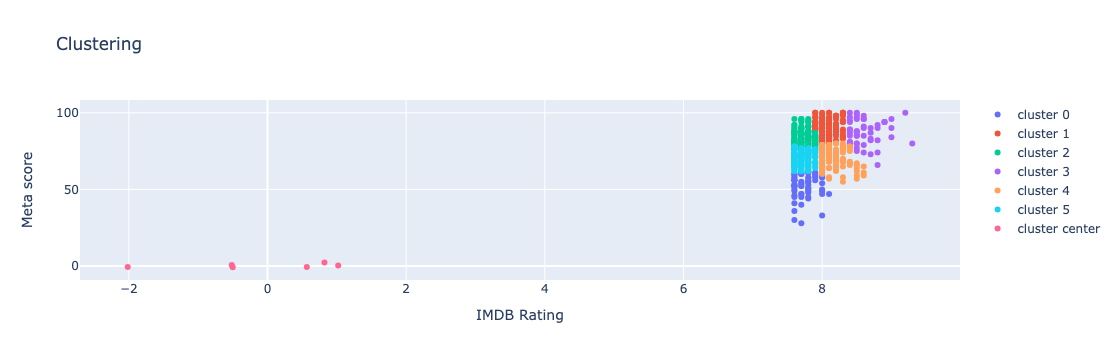

In [28]:
plot_data = []
for clus in set(data_km['cluster']):
    df = data_km[data_km['cluster'] == clus]
    plot_data.append(go.Scatter(x= df['IMDB_Rating'], y= df['Meta_score'], 
                                # text=df["name"], 
                                name = 'cluster ' + str(clus), mode = 'markers'))

# Added the following for cluster centers
df_cc = pd.DataFrame(km.cluster_centers_)
plot_data.append(go.Scatter(x= df_cc[1], y= df_cc[0], 
                            # text=df["name"], 
                            name = 'cluster center', mode = 'markers'))

layout = go.Layout(xaxis = dict(title='IMDB Rating'), yaxis = dict(title= 'Meta score'), 
                   title = 'Clustering')
fig = go.Figure(data= plot_data, layout=layout)
plotly.offline.iplot(fig)

## clusters 2 and 5 has very small widths on the X-axis

KMeans(max_iter=500, n_clusters=1, random_state=50)

KMeans(max_iter=500, n_clusters=2, random_state=50)

KMeans(max_iter=500, n_clusters=3, random_state=50)

KMeans(max_iter=500, n_clusters=4, random_state=50)

KMeans(max_iter=500, n_clusters=5, random_state=50)

KMeans(max_iter=500, n_clusters=6, random_state=50)

KMeans(max_iter=500, n_clusters=7, random_state=50)

KMeans(max_iter=500, random_state=50)

KMeans(max_iter=500, n_clusters=9, random_state=50)

KMeans(max_iter=500, n_clusters=10, random_state=50)

KMeans(max_iter=500, n_clusters=11, random_state=50)

KMeans(max_iter=500, n_clusters=12, random_state=50)

KMeans(max_iter=500, n_clusters=13, random_state=50)

KMeans(max_iter=500, n_clusters=14, random_state=50)

KMeans(max_iter=500, n_clusters=15, random_state=50)

KMeans(max_iter=500, n_clusters=16, random_state=50)

KMeans(max_iter=500, n_clusters=17, random_state=50)

KMeans(max_iter=500, n_clusters=18, random_state=50)

KMeans(max_iter=500, n_clusters=19, random_state=50)

KMeans(max_iter=500, n_clusters=20, random_state=50)

KMeans(max_iter=500, n_clusters=21, random_state=50)

KMeans(max_iter=500, n_clusters=22, random_state=50)

KMeans(max_iter=500, n_clusters=23, random_state=50)

KMeans(max_iter=500, n_clusters=24, random_state=50)

KMeans(max_iter=500, n_clusters=25, random_state=50)

KMeans(max_iter=500, n_clusters=26, random_state=50)

KMeans(max_iter=500, n_clusters=27, random_state=50)

KMeans(max_iter=500, n_clusters=28, random_state=50)

KMeans(max_iter=500, n_clusters=29, random_state=50)

Text(0.5, 0, 'Number of Clusters')

Text(0, 0.5, 'Distortion')

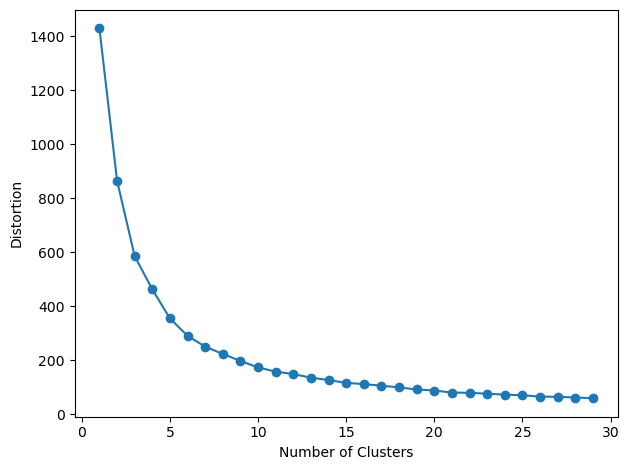

In [29]:
distortions = []
for i in range(1, 30): 
    km = KMeans(n_clusters = i, 
           init = 'k-means++', # this initializes by placing the initial ones randomly and uniformly in grid
           n_init = 10, 
           max_iter = 500, 
           # tol = 1e-04, 
           random_state = 50)
    km.fit(scaled_data_rating)
    distortions.append(km.inertia_)
plt.plot(range(1,30), distortions, marker = 'o')
plt.xlabel('Number of Clusters')
plt.ylabel('Distortion')
plt.tight_layout()
plt.show()

## distortion approximately for K = 5 clusters is 350

## 2 d

KMeans(max_iter=500, n_clusters=1, random_state=50)

KMeans(max_iter=500, n_clusters=2, random_state=50)

KMeans(max_iter=500, n_clusters=3, random_state=50)

KMeans(max_iter=500, n_clusters=4, random_state=50)

KMeans(max_iter=500, n_clusters=5, random_state=50)

KMeans(max_iter=500, n_clusters=6, random_state=50)

KMeans(max_iter=500, n_clusters=7, random_state=50)

KMeans(max_iter=500, random_state=50)

KMeans(max_iter=500, n_clusters=9, random_state=50)

Text(0.5, 0, 'Number of Clusters')

Text(0, 0.5, 'Distortion')

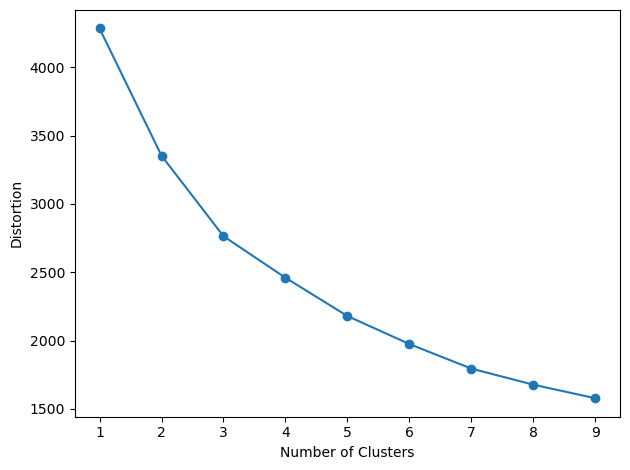

In [30]:
distortions = []
for i in range(1, 10): 
    km = KMeans(n_clusters = i, 
           init = 'k-means++', # this initializes by placing the initial ones randomly and uniformly in grid
           n_init = 10, 
           max_iter = 500, 
           # tol = 1e-04, 
           random_state = 50)
    km.fit(scaled_data_numeric)
    distortions.append(km.inertia_)
plt.plot(range(1,10), distortions, marker = 'o')
plt.xlabel('Number of Clusters')
plt.ylabel('Distortion')
plt.tight_layout()
plt.show()

## distortions reduced by 3000

## 3 a

In [31]:
from sklearn.cluster import AgglomerativeClustering

ac = AgglomerativeClustering(n_clusters=None, distance_threshold=8.0  ,
           affinity = 'euclidean', 
           linkage = 'complete')
data_ac = pd.DataFrame(ac.fit_predict(scaled_data_numeric), index = scaled_data_numeric.index)
data_ac.head()

,0
0,2
1,2
2,2
3,2
4,1


In [32]:
data_ac.rename(columns = {0:'cluster'}, inplace = True)
# data_ac = data_ac.merge(airbnb_data[['latitude', 'longitude']], left_index = True, right_index = True)
# If we use the above, we would get the actual latitude used in the data as opposed to the scaled one with below
# But scaled is what we have for the cetroids, so using it
data_ac = data_ac.merge(movie_data, left_index = True, right_index = True)
data_ac.head()

,cluster,Series_Title,Released_Year,Certificate,Runtime,Genre,IMDB_Rating,Meta_score,Director,Star1,Star2,Star3,Star4,No_of_Votes,Gross
0,2,The Shawshank Redemption,1994,A,142,Drama,9.30,80.00,Frank Darabont,Tim Robbins,Morgan Freeman,Bob Gunton,William Sadler,2343110,28341469
1,2,The Godfather,1972,A,175,"Crime, Drama",9.20,100.00,Francis Ford Coppola,Marlon Brando,Al Pacino,James Caan,Diane Keaton,1620367,134966411
2,2,The Dark Knight,2008,UA,152,"Action, Crime, Drama",9.00,84.00,Christopher Nolan,Christian Bale,Heath Ledger,Aaron Eckhart,Michael Caine,2303232,534858444
3,2,The Godfather: Part II,1974,A,202,"Crime, Drama",9.00,90.00,Francis Ford Coppola,Al Pacino,Robert De Niro,Robert Duvall,Diane Keaton,1129952,57300000
4,1,12 Angry Men,1957,U,96,"Crime, Drama",9.00,96.00,Sidney Lumet,Henry Fonda,Lee J. Cobb,Martin Balsam,John Fiedler,689845,4360000


In [33]:
set(data_ac['cluster'])

{0, 1, 2, 3}

## total 4 clusters obtained

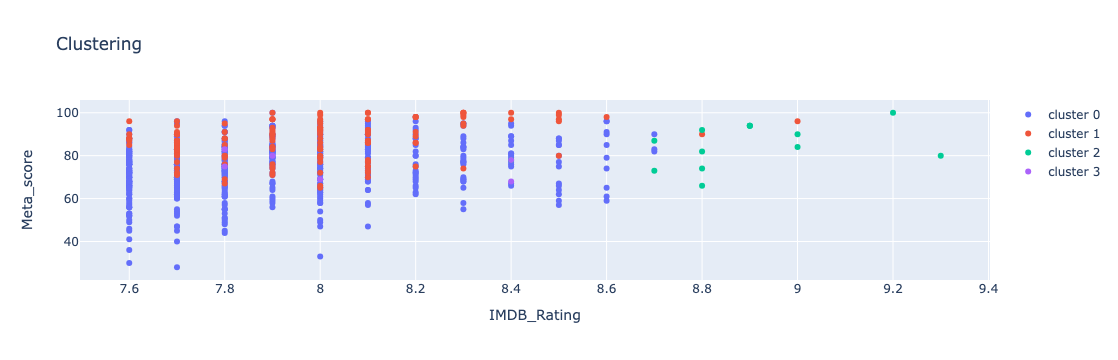

In [34]:
plot_data = []
for clus in set(data_ac['cluster']):
    df = data_ac[data_ac['cluster'] == clus]
    plot_data.append(go.Scatter(x= df['IMDB_Rating'], y= df['Meta_score'], 
                                # text=df["name"], 
                                name = 'cluster ' + str(clus), mode = 'markers'))

layout = go.Layout(xaxis = dict(title='IMDB_Rating'), yaxis = dict(title= 'Meta_score'), 
                   title = 'Clustering')
fig = go.Figure(data= plot_data, layout=layout)
plotly.offline.iplot(fig)

In [35]:
z=data_ac[data_ac['cluster']==3]
z

,cluster,Series_Title,Released_Year,Certificate,Runtime,Genre,IMDB_Rating,Meta_score,Director,Star1,Star2,Star3,Star4,No_of_Votes,Gross
51,3,Avengers: Endgame,2019,UA,181,"Action, Adventure, Drama",8.40,78.00,Anthony Russo,Joe Russo,Robert Downey Jr.,Chris Evans,Mark Ruffalo,809955,858373000
52,3,Avengers: Infinity War,2018,UA,149,"Action, Adventure, Sci-Fi",8.40,68.00,Anthony Russo,Joe Russo,Robert Downey Jr.,Chris Hemsworth,Mark Ruffalo,834477,678815482
229,3,The Avengers,2012,UA,143,"Action, Adventure, Sci-Fi",8.00,69.00,Joss Whedon,Robert Downey Jr.,Chris Evans,Scarlett Johansson,Jeremy Renner,1260806,623279547
315,3,Star Wars: Episode VII - The Force Awakens,2015,U,138,"Action, Adventure, Sci-Fi",7.90,80.00,J.J. Abrams,Daisy Ridley,John Boyega,Oscar Isaac,Domhnall Gleeson,860823,936662225
416,3,Avatar,2009,UA,162,"Action, Adventure, Fantasy",7.80,83.00,James Cameron,Sam Worthington,Zoe Saldana,Sigourney Weaver,Michelle Rodriguez,1118998,760507625
443,3,Titanic,1997,UA,194,"Drama, Romance",7.80,75.00,James Cameron,Leonardo DiCaprio,Kate Winslet,Billy Zane,Kathy Bates,1046089,659325379


## The matrix does not belong to same cluster

## 4

In [36]:
movie_data

,Series_Title,Released_Year,Certificate,Runtime,Genre,IMDB_Rating,Meta_score,Director,Star1,Star2,Star3,Star4,No_of_Votes,Gross
0,The Shawshank Redemption,1994,A,142,Drama,9.30,80.00,Frank Darabont,Tim Robbins,Morgan Freeman,Bob Gunton,William Sadler,2343110,28341469
1,The Godfather,1972,A,175,"Crime, Drama",9.20,100.00,Francis Ford Coppola,Marlon Brando,Al Pacino,James Caan,Diane Keaton,1620367,134966411
2,The Dark Knight,2008,UA,152,"Action, Crime, Drama",9.00,84.00,Christopher Nolan,Christian Bale,Heath Ledger,Aaron Eckhart,Michael Caine,2303232,534858444
3,The Godfather: Part II,1974,A,202,"Crime, Drama",9.00,90.00,Francis Ford Coppola,Al Pacino,Robert De Niro,Robert Duvall,Diane Keaton,1129952,57300000
4,12 Angry Men,1957,U,96,"Crime, Drama",9.00,96.00,Sidney Lumet,Henry Fonda,Lee J. Cobb,Martin Balsam,John Fiedler,689845,4360000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
709,Giù la testa,1971,PG,157,"Drama, War, Western",7.60,77.00,Sergio Leone,Rod Steiger,James Coburn,Romolo Valli,Maria Monti,30144,696690
710,Kelly's Heroes,1970,GP,144,"Adventure, Comedy, War",7.60,50.00,Brian G. Hutton,Clint Eastwood,Telly Savalas,Don Rickles,Carroll O'Connor,45338,1378435
711,The Jungle Book,1967,U,78,"Animation, Adventure, Family",7.60,65.00,Wolfgang Reitherman,Phil Harris,Sebastian Cabot,Louis Prima,Bruce Reitherman,166409,141843612
712,A Hard Day's Night,1964,U,87,"Comedy, Music, Musical",7.60,96.00,Richard Lester,John Lennon,Paul McCartney,George Harrison,Ringo Starr,40351,13780024


In [37]:
top_movie_data=movie_data[movie_data['IMDB_Rating']>8.3]

## 4 a

In [38]:
top_movie_data

,Series_Title,Released_Year,Certificate,Runtime,Genre,IMDB_Rating,Meta_score,Director,Star1,Star2,Star3,Star4,No_of_Votes,Gross
0,The Shawshank Redemption,1994,A,142,Drama,9.30,80.00,Frank Darabont,Tim Robbins,Morgan Freeman,Bob Gunton,William Sadler,2343110,28341469
1,The Godfather,1972,A,175,"Crime, Drama",9.20,100.00,Francis Ford Coppola,Marlon Brando,Al Pacino,James Caan,Diane Keaton,1620367,134966411
2,The Dark Knight,2008,UA,152,"Action, Crime, Drama",9.00,84.00,Christopher Nolan,Christian Bale,Heath Ledger,Aaron Eckhart,Michael Caine,2303232,534858444
3,The Godfather: Part II,1974,A,202,"Crime, Drama",9.00,90.00,Francis Ford Coppola,Al Pacino,Robert De Niro,Robert Duvall,Diane Keaton,1129952,57300000
4,12 Angry Men,1957,U,96,"Crime, Drama",9.00,96.00,Sidney Lumet,Henry Fonda,Lee J. Cobb,Martin Balsam,John Fiedler,689845,4360000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
63,The Shining,1980,A,146,"Drama, Horror",8.40,66.00,Stanley Kubrick,Jack Nicholson,Shelley Duvall,Danny Lloyd,Scatman Crothers,898237,44017374
64,Apocalypse Now,1979,R,147,"Drama, Mystery, War",8.40,94.00,Francis Ford Coppola,Martin Sheen,Marlon Brando,Robert Duvall,Frederic Forrest,606398,83471511
65,Alien,1979,R,117,"Horror, Sci-Fi",8.40,89.00,Ridley Scott,Sigourney Weaver,Tom Skerritt,John Hurt,Veronica Cartwright,787806,78900000
66,Dr. Strangelove or: How I Learned to Stop Worr...,1964,A,95,Comedy,8.40,97.00,Stanley Kubrick,Peter Sellers,George C. Scott,Sterling Hayden,Keenan Wynn,450474,275902


## 68 movies are there in top-movie data

In [39]:
top_movie_data_numeric=top_movie_data[['Released_Year','Runtime','IMDB_Rating','Meta_score','No_of_Votes', 'Gross']]
top_movie_data_rating=top_movie_data[['IMDB_Rating', 'Meta_score']]

In [40]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
top_scaled_data_numeric = pd.DataFrame(sc.fit_transform(top_movie_data_numeric), columns = top_movie_data_numeric.columns, index = top_movie_data_numeric.index)
top_scaled_data_numeric

,Released_Year,Runtime,IMDB_Rating,Meta_score,No_of_Votes,Gross
0,0.07,0.17,3.51,-0.20,2.61,-0.65
1,-0.99,1.28,3.02,1.52,1.23,-0.03
2,0.75,0.51,2.03,0.14,2.53,2.31
3,-0.89,2.18,2.03,0.66,0.30,-0.49
4,-1.72,-1.37,2.03,1.17,-0.53,-0.79
...,...,...,...,...,...,...
63,-0.60,0.30,-0.91,-1.40,-0.14,-0.56
64,-0.65,0.34,-0.91,1.00,-0.69,-0.33
65,-0.65,-0.67,-0.91,0.57,-0.35,-0.36
66,-1.38,-1.41,-0.91,1.26,-0.99,-0.82


In [41]:

km = KMeans(n_clusters = 6, 
        init = 'k-means++', # this initializes by placing the initial ones randomly and uniformly in grid
        n_init = 10, 
        max_iter = 500, 
        # tol = 1e-04, 
        random_state = 50)
data_km = pd.DataFrame(km.fit_predict(top_scaled_data_numeric), index = top_scaled_data_numeric.index)

In [42]:
data_km.rename(columns = {0:'cluster'}, inplace = True)
# data_ac = data_ac.merge(airbnb_data[['latitude', 'longitude']], left_index = True, right_index = True)
# If we use the above, we would get the actual latitude used in the data as opposed to the scaled one with below
# But scaled is what we have for the cetroids, so using it
data_km = data_km.merge(top_movie_data, left_index = True, right_index = True)
data_km

,cluster,Series_Title,Released_Year,Certificate,Runtime,Genre,IMDB_Rating,Meta_score,Director,Star1,Star2,Star3,Star4,No_of_Votes,Gross
0,2,The Shawshank Redemption,1994,A,142,Drama,9.30,80.00,Frank Darabont,Tim Robbins,Morgan Freeman,Bob Gunton,William Sadler,2343110,28341469
1,2,The Godfather,1972,A,175,"Crime, Drama",9.20,100.00,Francis Ford Coppola,Marlon Brando,Al Pacino,James Caan,Diane Keaton,1620367,134966411
2,2,The Dark Knight,2008,UA,152,"Action, Crime, Drama",9.00,84.00,Christopher Nolan,Christian Bale,Heath Ledger,Aaron Eckhart,Michael Caine,2303232,534858444
3,2,The Godfather: Part II,1974,A,202,"Crime, Drama",9.00,90.00,Francis Ford Coppola,Al Pacino,Robert De Niro,Robert Duvall,Diane Keaton,1129952,57300000
4,3,12 Angry Men,1957,U,96,"Crime, Drama",9.00,96.00,Sidney Lumet,Henry Fonda,Lee J. Cobb,Martin Balsam,John Fiedler,689845,4360000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
63,5,The Shining,1980,A,146,"Drama, Horror",8.40,66.00,Stanley Kubrick,Jack Nicholson,Shelley Duvall,Danny Lloyd,Scatman Crothers,898237,44017374
64,0,Apocalypse Now,1979,R,147,"Drama, Mystery, War",8.40,94.00,Francis Ford Coppola,Martin Sheen,Marlon Brando,Robert Duvall,Frederic Forrest,606398,83471511
65,0,Alien,1979,R,117,"Horror, Sci-Fi",8.40,89.00,Ridley Scott,Sigourney Weaver,Tom Skerritt,John Hurt,Veronica Cartwright,787806,78900000
66,3,Dr. Strangelove or: How I Learned to Stop Worr...,1964,A,95,Comedy,8.40,97.00,Stanley Kubrick,Peter Sellers,George C. Scott,Sterling Hayden,Keenan Wynn,450474,275902


## 4b

In [43]:
data_km[data_km['Series_Title']=='Star Wars']
data_km[data_km['Series_Title']=='The Departed']
data_km[data_km['Series_Title']=='Alien']
data_km[data_km['Series_Title']=='Coco']


,cluster,Series_Title,Released_Year,Certificate,Runtime,Genre,IMDB_Rating,Meta_score,Director,Star1,Star2,Star3,Star4,No_of_Votes,Gross
27,0,Star Wars,1977,UA,121,"Action, Adventure, Fantasy",8.60,90.00,George Lucas,Mark Hamill,Harrison Ford,Carrie Fisher,Alec Guinness,1231473,322740140


,cluster,Series_Title,Released_Year,Certificate,Runtime,Genre,IMDB_Rating,Meta_score,Director,Star1,Star2,Star3,Star4,No_of_Votes,Gross
33,0,The Departed,2006,A,151,"Crime, Drama, Thriller",8.50,85.00,Martin Scorsese,Leonardo DiCaprio,Matt Damon,Jack Nicholson,Mark Wahlberg,1189773,132384315


,cluster,Series_Title,Released_Year,Certificate,Runtime,Genre,IMDB_Rating,Meta_score,Director,Star1,Star2,Star3,Star4,No_of_Votes,Gross
65,0,Alien,1979,R,117,"Horror, Sci-Fi",8.40,89.00,Ridley Scott,Sigourney Weaver,Tom Skerritt,John Hurt,Veronica Cartwright,787806,78900000


,cluster,Series_Title,Released_Year,Certificate,Runtime,Genre,IMDB_Rating,Meta_score,Director,Star1,Star2,Star3,Star4,No_of_Votes,Gross
53,1,Coco,2017,U,105,"Animation, Adventure, Family",8.40,81.00,Lee Unkrich,Adrian Molina,Anthony Gonzalez,Gael García Bernal,Benjamin Bratt,384171,209726015


## Coco is not part of same clsuter

## 4 c

In [44]:
data_km[data_km['Series_Title']=='Interstellar']
data_km[data_km['Series_Title']=='Fight Club']
data_km[data_km['Series_Title']=='The Prestige']
data_km[data_km['Series_Title']=='Joker']

,cluster,Series_Title,Released_Year,Certificate,Runtime,Genre,IMDB_Rating,Meta_score,Director,Star1,Star2,Star3,Star4,No_of_Votes,Gross
19,5,Interstellar,2014,UA,169,"Adventure, Drama, Sci-Fi",8.60,74.00,Christopher Nolan,Matthew McConaughey,Anne Hathaway,Jessica Chastain,Mackenzie Foy,1512360,188020017


,cluster,Series_Title,Released_Year,Certificate,Runtime,Genre,IMDB_Rating,Meta_score,Director,Star1,Star2,Star3,Star4,No_of_Votes,Gross
9,5,Fight Club,1999,A,139,Drama,8.80,66.00,David Fincher,Brad Pitt,Edward Norton,Meat Loaf,Zach Grenier,1854740,37030102


,cluster,Series_Title,Released_Year,Certificate,Runtime,Genre,IMDB_Rating,Meta_score,Director,Star1,Star2,Star3,Star4,No_of_Votes,Gross
32,5,The Prestige,2006,U,130,"Drama, Mystery, Sci-Fi",8.50,66.00,Christopher Nolan,Christian Bale,Hugh Jackman,Scarlett Johansson,Michael Caine,1190259,53089891


,cluster,Series_Title,Released_Year,Certificate,Runtime,Genre,IMDB_Rating,Meta_score,Director,Star1,Star2,Star3,Star4,No_of_Votes,Gross
29,5,Joker,2019,A,122,"Crime, Drama, Thriller",8.50,59.00,Todd Phillips,Joaquin Phoenix,Robert De Niro,Zazie Beetz,Frances Conroy,939252,335451311


In [45]:
data_km[data_km['Star1']=='Tom Hanks']

,cluster,Series_Title,Released_Year,Certificate,Runtime,Genre,IMDB_Rating,Meta_score,Director,Star1,Star2,Star3,Star4,No_of_Votes,Gross
11,2,Forrest Gump,1994,UA,142,"Drama, Romance",8.80,82.00,Robert Zemeckis,Tom Hanks,Robin Wright,Gary Sinise,Sally Field,1809221,330252182
22,0,Saving Private Ryan,1998,R,169,"Drama, War",8.60,91.00,Steven Spielberg,Tom Hanks,Matt Damon,Tom Sizemore,Edward Burns,1235804,216540909
23,5,The Green Mile,1999,A,189,"Crime, Drama, Fantasy",8.60,61.00,Frank Darabont,Tom Hanks,Michael Clarke Duncan,David Morse,Bonnie Hunt,1147794,136801374


## All movies with Tom Hanks in Star1 role are not in the same cluster

In [46]:
data_km[data_km['Director']=='Alfred Hitchcock']

,cluster,Series_Title,Released_Year,Certificate,Runtime,Genre,IMDB_Rating,Meta_score,Director,Star1,Star2,Star3,Star4,No_of_Votes,Gross
44,3,Psycho,1960,A,109,"Horror, Mystery, Thriller",8.50,97.00,Alfred Hitchcock,Anthony Perkins,Janet Leigh,Vera Miles,John Gavin,604211,32000000
67,3,Rear Window,1954,U,112,"Mystery, Thriller",8.40,100.00,Alfred Hitchcock,James Stewart,Grace Kelly,Wendell Corey,Thelma Ritter,444074,36764313


In [47]:
data_km[data_km['cluster']==4]

,cluster,Series_Title,Released_Year,Certificate,Runtime,Genre,IMDB_Rating,Meta_score,Director,Star1,Star2,Star3,Star4,No_of_Votes,Gross
51,4,Avengers: Endgame,2019,UA,181,"Action, Adventure, Drama",8.40,78.00,Anthony Russo,Joe Russo,Robert Downey Jr.,Chris Evans,Mark Ruffalo,809955,858373000
52,4,Avengers: Infinity War,2018,UA,149,"Action, Adventure, Sci-Fi",8.40,68.00,Anthony Russo,Joe Russo,Robert Downey Jr.,Chris Hemsworth,Mark Ruffalo,834477,678815482
55,4,The Dark Knight Rises,2012,UA,164,"Action, Adventure",8.40,78.00,Christopher Nolan,Christian Bale,Tom Hardy,Anne Hathaway,Gary Oldman,1516346,448139099


## 5 a

In [48]:
drama_data=movie_data[movie_data['Genre']=='Drama']

In [49]:
drama_data.shape

(58, 14)

## 58 rows

In [50]:
drama_data_numeric=drama_data[['Released_Year','Runtime','IMDB_Rating','Meta_score','No_of_Votes', 'Gross','Certificate']]

In [51]:
drama_data_numeric = pd.get_dummies(drama_data_numeric)
drama_data_numeric

,Released_Year,Runtime,IMDB_Rating,Meta_score,No_of_Votes,Gross,Certificate_A,Certificate_PG-13,Certificate_Passed,Certificate_R,Certificate_U,Certificate_UA
0,1994,142,9.30,80.00,2343110,28341469,1,0,0,0,0,0
9,1999,139,8.80,66.00,1854740,37030102,1,0,0,0,0,0
17,1975,133,8.70,83.00,918088,112000000,1,0,0,0,0,0
36,1998,119,8.50,62.00,1034705,6719864,0,0,0,1,0,0
48,2018,126,8.40,75.00,62635,1661096,1,0,0,0,0,0
69,2012,115,8.30,77.00,281623,687185,0,0,0,1,0,0
70,2011,123,8.30,95.00,220002,7098492,0,1,0,0,0,0
76,2000,102,8.30,68.00,766870,3635482,1,0,0,0,0,0
77,1999,122,8.30,84.00,1069738,130096601,0,0,0,0,0,1
109,2007,158,8.20,93.00,517359,40222514,1,0,0,0,0,0


In [52]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
scaled_data_numeric = pd.DataFrame(sc.fit_transform(drama_data_numeric), columns = drama_data_numeric.columns, index = drama_data_numeric.index)
scaled_data_numeric

,Released_Year,Runtime,IMDB_Rating,Meta_score,No_of_Votes,Gross,Certificate_A,Certificate_PG-13,Certificate_Passed,Certificate_R,Certificate_U,Certificate_UA
0,-0.21,0.72,4.06,0.20,4.82,-0.14,1.69,-0.37,-0.13,-0.67,-0.34,-0.48
9,0.10,0.58,2.56,-0.81,3.68,0.05,1.69,-0.37,-0.13,-0.67,-0.34,-0.48
17,-1.38,0.31,2.26,0.41,1.50,1.70,1.69,-0.37,-0.13,-0.67,-0.34,-0.48
36,0.04,-0.34,1.66,-1.09,1.77,-0.61,-0.59,-0.37,-0.13,1.49,-0.34,-0.48
48,1.28,-0.02,1.35,-0.16,-0.50,-0.72,1.69,-0.37,-0.13,-0.67,-0.34,-0.48
69,0.91,-0.52,1.05,-0.02,0.01,-0.74,-0.59,-0.37,-0.13,1.49,-0.34,-0.48
70,0.85,-0.15,1.05,1.27,-0.13,-0.60,-0.59,2.70,-0.13,-0.67,-0.34,-0.48
76,0.17,-1.12,1.05,-0.66,1.14,-0.68,1.69,-0.37,-0.13,-0.67,-0.34,-0.48
77,0.10,-0.20,1.05,0.48,1.85,2.10,-0.59,-0.37,-0.13,-0.67,-0.34,2.07
109,0.60,1.46,0.75,1.13,0.56,0.12,1.69,-0.37,-0.13,-0.67,-0.34,-0.48


In [53]:
km = KMeans(n_clusters = 3, 
        init = 'k-means++', # this initializes by placing the initial ones randomly and uniformly in grid
        n_init = 10, 
        max_iter = 500, 
        # tol = 1e-04, 
        random_state = 50)
data_km = pd.DataFrame(km.fit_predict(scaled_data_numeric), index = scaled_data_numeric.index)

In [54]:
data_km.rename(columns = {0:'cluster'}, inplace = True)
# data_ac = data_ac.merge(airbnb_data[['latitude', 'longitude']], left_index = True, right_index = True)
# If we use the above, we would get the actual latitude used in the data as opposed to the scaled one with below
# But scaled is what we have for the cetroids, so using it
data_km = data_km.merge(drama_data, left_index = True, right_index = True)
data_km

,cluster,Series_Title,Released_Year,Certificate,Runtime,Genre,IMDB_Rating,Meta_score,Director,Star1,Star2,Star3,Star4,No_of_Votes,Gross
0,2,The Shawshank Redemption,1994,A,142,Drama,9.30,80.00,Frank Darabont,Tim Robbins,Morgan Freeman,Bob Gunton,William Sadler,2343110,28341469
9,2,Fight Club,1999,A,139,Drama,8.80,66.00,David Fincher,Brad Pitt,Edward Norton,Meat Loaf,Zach Grenier,1854740,37030102
17,2,One Flew Over the Cuckoo's Nest,1975,A,133,Drama,8.70,83.00,Milos Forman,Jack Nicholson,Louise Fletcher,Michael Berryman,Peter Brocco,918088,112000000
36,0,American History X,1998,R,119,Drama,8.50,62.00,Tony Kaye,Edward Norton,Edward Furlong,Beverly D'Angelo,Jennifer Lien,1034705,6719864
48,2,Capharnaüm,2018,A,126,Drama,8.40,75.00,Nadine Labaki,Zain Al Rafeea,Yordanos Shiferaw,Boluwatife Treasure Bankole,Kawsar Al Haddad,62635,1661096
69,0,Jagten,2012,R,115,Drama,8.30,77.00,Thomas Vinterberg,Mads Mikkelsen,Thomas Bo Larsen,Annika Wedderkopp,Lasse Fogelstrøm,281623,687185
70,0,Jodaeiye Nader az Simin,2011,PG-13,123,Drama,8.30,95.00,Asghar Farhadi,Payman Maadi,Leila Hatami,Sareh Bayat,Shahab Hosseini,220002,7098492
76,2,Requiem for a Dream,2000,A,102,Drama,8.30,68.00,Darren Aronofsky,Ellen Burstyn,Jared Leto,Jennifer Connelly,Marlon Wayans,766870,3635482
77,1,American Beauty,1999,UA,122,Drama,8.30,84.00,Sam Mendes,Kevin Spacey,Annette Bening,Thora Birch,Wes Bentley,1069738,130096601
109,2,There Will Be Blood,2007,A,158,Drama,8.20,93.00,Paul Thomas Anderson,Daniel Day-Lewis,Paul Dano,Ciarán Hinds,Martin Stringer,517359,40222514


## 5 b

In [55]:
data_km[data_km['Series_Title']=='The Color Purple']
data_km[data_km['Series_Title']=='The Help']
data_km[data_km['Series_Title']=='Rain Man']
data_km[data_km['Series_Title']=='Fight Club']

,cluster,Series_Title,Released_Year,Certificate,Runtime,Genre,IMDB_Rating,Meta_score,Director,Star1,Star2,Star3,Star4,No_of_Votes,Gross
467,1,The Color Purple,1985,U,154,Drama,7.80,78.00,Steven Spielberg,Danny Glover,Whoopi Goldberg,Oprah Winfrey,Margaret Avery,78321,98467863


,cluster,Series_Title,Released_Year,Certificate,Runtime,Genre,IMDB_Rating,Meta_score,Director,Star1,Star2,Star3,Star4,No_of_Votes,Gross
222,1,The Help,2011,UA,146,Drama,8.00,62.00,Tate Taylor,Emma Stone,Viola Davis,Octavia Spencer,Bryce Dallas Howard,428521,169708112


,cluster,Series_Title,Released_Year,Certificate,Runtime,Genre,IMDB_Rating,Meta_score,Director,Star1,Star2,Star3,Star4,No_of_Votes,Gross
270,1,Rain Man,1988,U,133,Drama,8.00,65.00,Barry Levinson,Dustin Hoffman,Tom Cruise,Valeria Golino,Gerald R. Molen,473064,178800000


,cluster,Series_Title,Released_Year,Certificate,Runtime,Genre,IMDB_Rating,Meta_score,Director,Star1,Star2,Star3,Star4,No_of_Votes,Gross
9,2,Fight Club,1999,A,139,Drama,8.80,66.00,David Fincher,Brad Pitt,Edward Norton,Meat Loaf,Zach Grenier,1854740,37030102


## Fight Club is not part of same cluster

## 5 c

In [56]:
data_km[data_km['cluster']==0]

,cluster,Series_Title,Released_Year,Certificate,Runtime,Genre,IMDB_Rating,Meta_score,Director,Star1,Star2,Star3,Star4,No_of_Votes,Gross
36,0,American History X,1998,R,119,Drama,8.50,62.00,Tony Kaye,Edward Norton,Edward Furlong,Beverly D'Angelo,Jennifer Lien,1034705,6719864
69,0,Jagten,2012,R,115,Drama,8.30,77.00,Thomas Vinterberg,Mads Mikkelsen,Thomas Bo Larsen,Annika Wedderkopp,Lasse Fogelstrøm,281623,687185
70,0,Jodaeiye Nader az Simin,2011,PG-13,123,Drama,8.30,95.00,Asghar Farhadi,Payman Maadi,Leila Hatami,Sareh Bayat,Shahab Hosseini,220002,7098492
135,0,Mommy,2014,R,139,Drama,8.10,74.00,Xavier Dolan,Anne Dorval,Antoine Olivier Pilon,Suzanne Clément,Patrick Huard,50700,3492754
150,0,Gran Torino,2008,R,116,Drama,8.10,72.00,Clint Eastwood,Clint Eastwood,Bee Vang,Christopher Carley,Ahney Her,720450,148095302
212,0,Short Term 12,2013,R,96,Drama,8.00,82.00,Destin Daniel Cretton,Brie Larson,Frantz Turner,John Gallagher Jr.,Kaitlyn Dever,81770,1010414
251,0,Magnolia,1999,R,188,Drama,8.00,77.00,Paul Thomas Anderson,Tom Cruise,Jason Robards,Julianne Moore,Philip Seymour Hoffman,289742,22455976
254,0,Festen,1998,R,105,Drama,8.00,82.00,Thomas Vinterberg,Ulrich Thomsen,Henning Moritzen,Thomas Bo Larsen,Paprika Steen,78341,1647780
255,0,Central do Brasil,1998,R,110,Drama,8.00,80.00,Walter Salles,Fernanda Montenegro,Vinícius de Oliveira,Marília Pêra,Soia Lira,36419,5595428
257,0,Sling Blade,1996,R,135,Drama,8.00,84.00,Billy Bob Thornton,Billy Bob Thornton,Dwight Yoakam,J.T. Walsh,John Ritter,86838,24475416


In [57]:
data_km[data_km['cluster']==2]

,cluster,Series_Title,Released_Year,Certificate,Runtime,Genre,IMDB_Rating,Meta_score,Director,Star1,Star2,Star3,Star4,No_of_Votes,Gross
0,2,The Shawshank Redemption,1994,A,142,Drama,9.30,80.00,Frank Darabont,Tim Robbins,Morgan Freeman,Bob Gunton,William Sadler,2343110,28341469
9,2,Fight Club,1999,A,139,Drama,8.80,66.00,David Fincher,Brad Pitt,Edward Norton,Meat Loaf,Zach Grenier,1854740,37030102
17,2,One Flew Over the Cuckoo's Nest,1975,A,133,Drama,8.70,83.00,Milos Forman,Jack Nicholson,Louise Fletcher,Michael Berryman,Peter Brocco,918088,112000000
48,2,Capharnaüm,2018,A,126,Drama,8.40,75.00,Nadine Labaki,Zain Al Rafeea,Yordanos Shiferaw,Boluwatife Treasure Bankole,Kawsar Al Haddad,62635,1661096
76,2,Requiem for a Dream,2000,A,102,Drama,8.30,68.00,Darren Aronofsky,Ellen Burstyn,Jared Leto,Jennifer Connelly,Marlon Wayans,766870,3635482
109,2,There Will Be Blood,2007,A,158,Drama,8.20,93.00,Paul Thomas Anderson,Daniel Day-Lewis,Paul Dano,Ciarán Hinds,Martin Stringer,517359,40222514
131,2,All About Eve,1950,Passed,138,Drama,8.20,98.00,Joseph L. Mankiewicz,Bette Davis,Anne Baxter,George Sanders,Celeste Holm,120539,10177
173,2,Trainspotting,1996,A,93,Drama,8.10,83.00,Danny Boyle,Ewan McGregor,Ewen Bremner,Jonny Lee Miller,Kevin McKidd,634716,16501785
187,2,Fanny och Alexander,1982,A,188,Drama,8.10,100.00,Ingmar Bergman,Bertil Guve,Pernilla Allwin,Kristina Adolphson,Börje Ahlstedt,57784,4971340
296,2,Cat on a Hot Tin Roof,1958,A,108,Drama,8.00,84.00,Richard Brooks,Elizabeth Taylor,Paul Newman,Burl Ives,Jack Carson,45062,17570324


In [58]:
data_km[data_km['Released_Year']>2000]

,cluster,Series_Title,Released_Year,Certificate,Runtime,Genre,IMDB_Rating,Meta_score,Director,Star1,Star2,Star3,Star4,No_of_Votes,Gross
48,2,Capharnaüm,2018,A,126,Drama,8.40,75.00,Nadine Labaki,Zain Al Rafeea,Yordanos Shiferaw,Boluwatife Treasure Bankole,Kawsar Al Haddad,62635,1661096
69,0,Jagten,2012,R,115,Drama,8.30,77.00,Thomas Vinterberg,Mads Mikkelsen,Thomas Bo Larsen,Annika Wedderkopp,Lasse Fogelstrøm,281623,687185
70,0,Jodaeiye Nader az Simin,2011,PG-13,123,Drama,8.30,95.00,Asghar Farhadi,Payman Maadi,Leila Hatami,Sareh Bayat,Shahab Hosseini,220002,7098492
109,2,There Will Be Blood,2007,A,158,Drama,8.20,93.00,Paul Thomas Anderson,Daniel Day-Lewis,Paul Dano,Ciarán Hinds,Martin Stringer,517359,40222514
135,0,Mommy,2014,R,139,Drama,8.10,74.00,Xavier Dolan,Anne Dorval,Antoine Olivier Pilon,Suzanne Clément,Patrick Huard,50700,3492754
150,0,Gran Torino,2008,R,116,Drama,8.10,72.00,Clint Eastwood,Clint Eastwood,Bee Vang,Christopher Carley,Ahney Her,720450,148095302
212,0,Short Term 12,2013,R,96,Drama,8.00,82.00,Destin Daniel Cretton,Brie Larson,Frantz Turner,John Gallagher Jr.,Kaitlyn Dever,81770,1010414
222,1,The Help,2011,UA,146,Drama,8.00,62.00,Tate Taylor,Emma Stone,Viola Davis,Octavia Spencer,Bryce Dallas Howard,428521,169708112
225,1,My Name Is Khan,2010,UA,165,Drama,8.00,50.00,Karan Johar,Shah Rukh Khan,Kajol,Sheetal Menon,Katie A. Keane,98575,4018695
306,1,"I, Daniel Blake",2016,UA,100,Drama,7.90,78.00,Ken Loach,Laura Obiols,Dave Johns,Hayley Squires,Sharon Percy,53818,258168


## Movies were clustered by Certificate where each cluster has 2 certificate types